In [1]:
# Import Libraries
import joblib
from matplotlib import scale
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from yellowbrick.cluster import KElbowVisualizer
# Suppress Warning

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("C:/NopBai/TS_HaHoang/wallmart/wallmart/wallmart/train.csv")
stores = pd.read_csv("C:/NopBai/TS_HaHoang/wallmart/wallmart/wallmart/stores.csv")
features = pd.read_csv("C:/NopBai/TS_HaHoang/wallmart/wallmart/wallmart/features.csv")

In [3]:
data.shape
print(data.head())

data.info()
data.isna().sum()

print(stores.head())
print(features.isna().sum())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
Store              0
Date               0
Temperature        0
Fue

In [4]:
# filling missing values
features['CPI'].fillna(features['CPI'].median(),inplace=True)
features['Unemployment'].fillna(features['Unemployment'].median(),inplace=True)

features['MarkDown1'].value_counts().unique()

from pandas.core.ops import flex_arith_method_FRAME
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x<0 else x )
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)
  
features.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [5]:
data = pd.merge(data,stores,on='Store',how='left')
data = pd.merge(data,features,on=['Store','Date'],how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [6]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [7]:
#check whether the column IsHoliday_x and IsHoliday_y are same or not
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [8]:
#Since this two columns are same so drop any one column and make another column as IsHoliday
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
#data.info()

In [9]:
'''
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week
data.head()
'''

"\ndata['Year'] = data['Date'].dt.year\ndata['Month'] = data['Date'].dt.month\ndata['Week'] = data['Date'].dt.week\ndata.head()\n"

In [10]:
#Outlier Detection and Abnormalities
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.head()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [11]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
print(store_data.head(2))
store_data.dropna(inplace=True)
data = store_data.copy()

   Store  Dept       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50    A  151315        42.31       2.572   
1     29     5 2010-02-05      15552.08    B   93638        24.36       2.788   

   MarkDown1  MarkDown2  ...  MarkDown4  MarkDown5         CPI  Unemployment  \
0        0.0        0.0  ...        0.0        0.0  211.096358         8.106   
1        0.0        0.0  ...        0.0        0.0  131.527903        10.064   

   IsHoliday       max       min          mean    median          std  
0      False  57592.12  14537.37  22513.322937  18535.48  9854.349032  
1      False  69467.35   6642.10  12931.821259  10898.36  8868.631880  

[2 rows x 21 columns]


In [12]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,0.0,0.0,211.096358,8.106,False,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,0.0,0.0,214.655459,6.415,False,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,0.0,0.0,214.655459,6.415,False,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,0.0,0.0,214.471451,6.299,False,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,0.0,0.0,214.655459,6.415,False,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [13]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,False,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,False,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,False,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,False,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [14]:
data.shape

(421533, 17)

In [15]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()
data_numeric.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown
Date,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0.0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0.0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0.0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0.0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0.0


In [16]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 17)

In [17]:
data=data[data['Weekly_Sales']>=0]
data.shape

(374247, 17)

In [18]:
data['IsHoliday'] = data['IsHoliday'].astype('int')
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [19]:
'''
#Average Monthly Sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('avg_monthly_sales.png')
#plt.grid()
'''

"\n#Average Monthly Sales\nplt.figure(figsize=(14,8))\nsns.barplot(x='Month',y='Weekly_Sales',data=data)\nplt.ylabel('Sales',fontsize=14)\nplt.xlabel('Months',fontsize=14)\nplt.title('Average Monthly Sales',fontsize=16)\nplt.savefig('avg_monthly_sales.png')\n#plt.grid()\n"

In [20]:
'''
# Monthly Sales for Each Year
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly
'''

'\n# Monthly Sales for Each Year\ndata_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc=\'sum\')\ndata_monthly\n'

In [21]:
'''
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.savefig('monthly_sales_every_year.png')
plt.show()
'''

"\nfig, axes = plt.subplots(3,4,figsize=(16,8))\nplt.suptitle('Monthly Sales for each Year', fontsize=18)\nk=1\nfor i in range(3):\n    for j in range(4):\n      sns.lineplot(ax=axes[i,j],data=data_monthly[k])\n      plt.subplots_adjust(wspace=0.4,hspace=0.32)\n      plt.ylabel(k,fontsize=12)\n      plt.xlabel('Years',fontsize=12)\n      k+=1\n\nplt.savefig('monthly_sales_every_year.png')\nplt.show()\n"

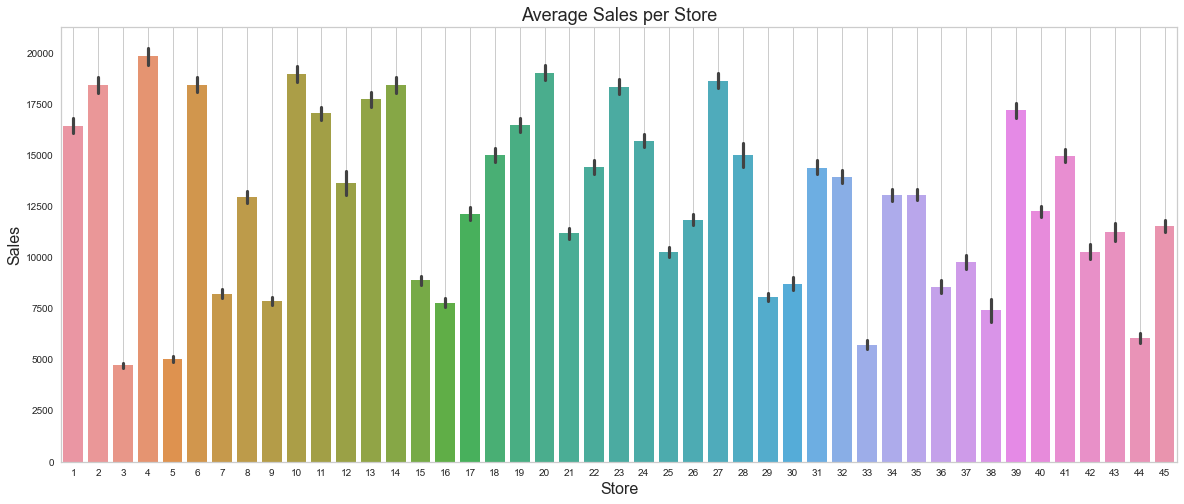

In [22]:
#Average Weekly Sales Store wise
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('avg_sales_store.png')
plt.show()

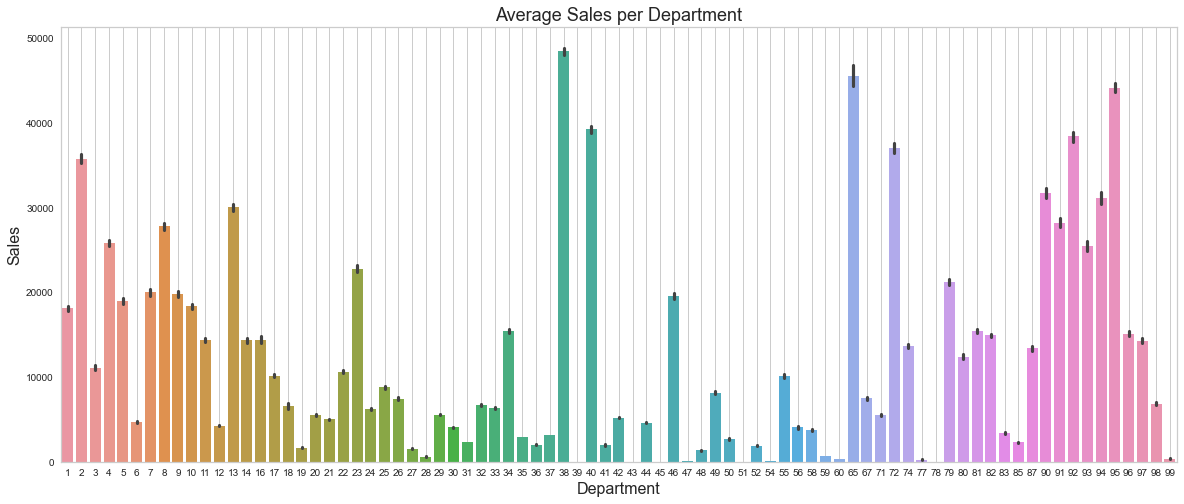

In [23]:
# Average sales per department
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.savefig('avg_sales_dept.png')
plt.show()


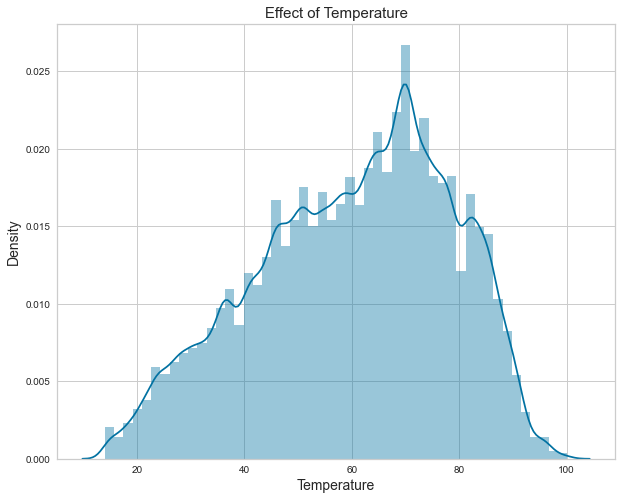

In [24]:
# Effect of Temperature on Sales
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.savefig('effect_of_temp.png')
plt.show()


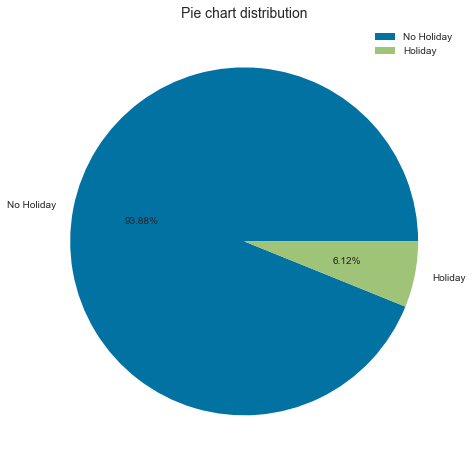

In [25]:
# Holiday Distribution
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('holiday_distribution.png')
plt.show() 

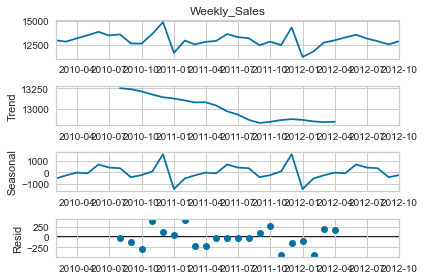

In [26]:
# Time Series Decompose
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.savefig('seasonal_decompose.png')
plt.show()


In [27]:
#One Hot Encoding
data.dtypes


Store                      int64
Dept                       int64
Date              datetime64[ns]
Weekly_Sales             float64
Type                      object
Size                       int64
Temperature              float64
Fuel_Price               float64
CPI                      float64
Unemployment             float64
IsHoliday                  int32
max                      float64
min                      float64
mean                     float64
median                   float64
std                      float64
Total_MarkDown           float64
dtype: object

In [28]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()
data_cat.head()

,Store,Dept,Type
Date,,,
2010-02-05,1,1,A
2010-02-05,9,97,B
2010-02-05,9,85,B
2010-02-05,8,80,A
2010-02-05,9,55,B


In [29]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
data.shape


(374247, 17)

In [31]:
data = pd.concat([data, data_cat],axis=1)
data.shape

(374247, 146)

In [32]:
data.drop(columns=cat_col,inplace=True)

data.drop(columns=['Date'],inplace=True)
data.shape

(374247, 142)

In [33]:
#Data Normalization
num_col = ['Weekly_Sales','Size','Temperature',
           'Fuel_Price','CPI','Unemployment','Total_MarkDown',
           'max','min','mean','median','std']

minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

data.head()


,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,max,min,mean,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,57592.12,14537.37,22513.322937,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,766.93,-9.92,372.655556,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2512.14,110.56,876.629441,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,11990.43,7414.43,9188.915105,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,29166.26,4791.74,8607.050490,...,0,0,0,0,0,0,0,0,1,0


In [34]:
data = normalization(data.copy(),num_col)
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,max,min,mean,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,0.088635,0.253530,0.208157,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,0.001180,0.064648,0.004499,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,0.003866,0.066212,0.009135,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,0.018453,0.161046,0.085594,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,0.044887,0.126993,0.080242,...,0,0,0,0,0,0,0,0,1,0


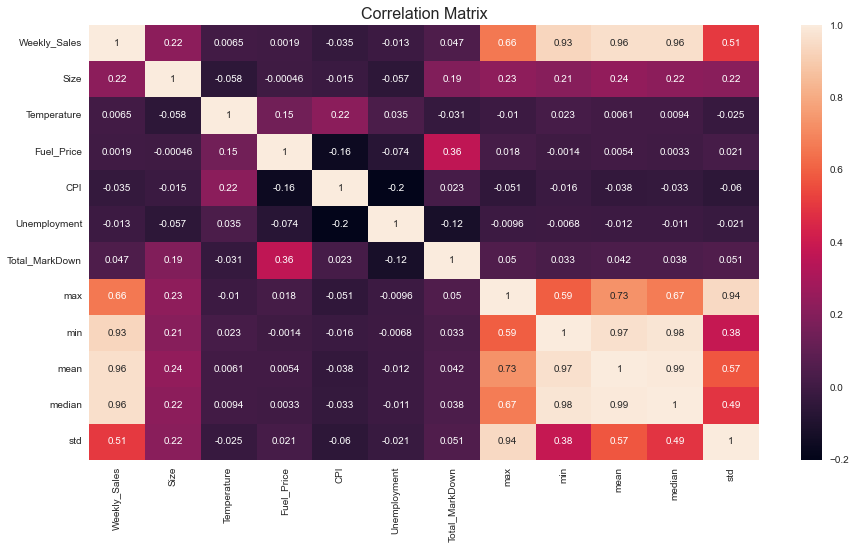

In [35]:
#Finding Correlation between features
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('correlation_matrix.png')
plt.show()


In [36]:

#Feature Elimination
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]
    
feature_rank


,rank,feature,importance
0,1,median,5.236308e-01
1,2,mean,4.045059e-01
2,3,Temperature,1.585314e-02
3,4,CPI,1.461427e-02
4,5,Fuel_Price,1.375994e-02
...,...,...,...
136,137,Dept_51,2.528419e-10
137,138,Dept_45,1.673726e-10
138,139,Dept_78,3.091394e-12
139,140,Dept_39,1.387158e-14


In [37]:

x = feature_rank.loc[0:25,['feature']]
x = x['feature'].tolist()
x


['median',
 'mean',
 'Temperature',
 'CPI',
 'Fuel_Price',
 'Unemployment',
 'Total_MarkDown',
 'min',
 'max',
 'std',
 'IsHoliday',
 'Size',
 'Dept_16',
 'Dept_5',
 'Dept_9',
 'Dept_1',
 'Dept_3',
 'Store_18',
 'Dept_18',
 'Dept_55',
 'Type_B',
 'Type_A',
 'Store_36',
 'Dept_11',
 'Store_35',
 'Dept_72']

In [38]:
'''
X = data[x]
Y = data['Weekly_Sales']

data = pd.concat([X,Y],axis=1)
data.head()
'''


"\nX = data[x]\nY = data['Weekly_Sales']\n\ndata = pd.concat([X,Y],axis=1)\ndata.head()\n"

In [39]:
""""
#Building the models
#Splitting data into train and test data
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

random_forest_accuracy = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",random_forest_accuracy)

y_pred = rf.predict(X_test)

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.head()

"""

'"\n#Building the models\n#Splitting data into train and test data\nX = data.drop([\'Weekly_Sales\'],axis=1)\nY = data.Weekly_Sales\n\nX_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)\n\nrf = RandomForestRegressor()\nrf.fit(X_train, y_train)\n\nrandom_forest_accuracy = rf.score(X_test,y_test)*100\nprint("Random Forest Regressor Accuracy - ",random_forest_accuracy)\n\ny_pred = rf.predict(X_test)\n\nprint("MAE" , metrics.mean_absolute_error(y_test, y_pred))\nprint("MSE" , metrics.mean_squared_error(y_test, y_pred))\nprint("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))\nprint("R2" , metrics.explained_variance_score(y_test, y_pred))\n\nrf_df = pd.DataFrame({\'Actual\': y_test, \'Predicted\': y_pred})\nrf_df.head()\n\n'

In [40]:
df = data[["Weekly_Sales","Temperature"]]
df

,Weekly_Sales,Temperature
Date,,
2010-02-05,0.342576,0.328495
2010-02-05,0.009188,0.278565
2010-02-05,0.009537,0.278565
2010-02-05,0.118953,0.233627
2010-02-05,0.152888,0.278565
...,...,...
2012-10-26,0.127259,0.647585
2012-10-26,0.000730,0.602996
2012-10-26,0.073391,0.522178


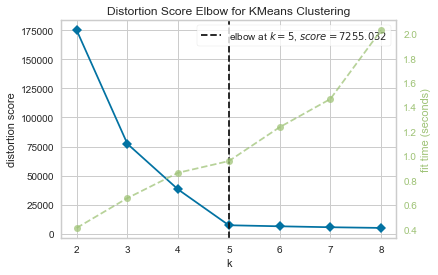

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

X = df  # Dữ liệu của bạn

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 9))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()



In [42]:
# K=3
kmeans = KMeans(n_clusters=5,init="k-means++", max_iter=300)
kmeans.fit(X)
kmeans.labels_

#Labeling
df["Cluster"] = kmeans.labels_
df.head(50)


,Weekly_Sales,Temperature,Cluster
Date,,,
2010-02-05,0.342576,0.328495,2
2010-02-05,0.009188,0.278565,2
2010-02-05,0.009537,0.278565,2
2010-02-05,0.118953,0.233627,2
2010-02-05,0.152888,0.278565,2
2010-02-05,0.015810,0.278565,2
2010-02-05,0.004905,0.278565,2
2010-02-05,0.035800,0.278565,2
2010-02-05,0.031351,0.278565,2


In [43]:
#Center cluster
import numpy as np
np.set_printoptions(precision=6, suppress=True)

print(kmeans.cluster_centers_)


[[0.070074 0.73957 ]
 [0.719902 0.511099]
 [0.132674 0.224956]
 [0.074713 0.482965]
 [0.367182 0.640956]]


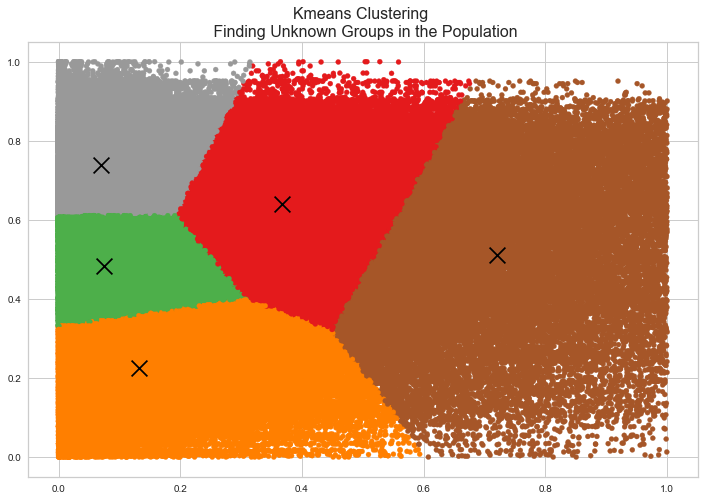

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
visualizer.poof()

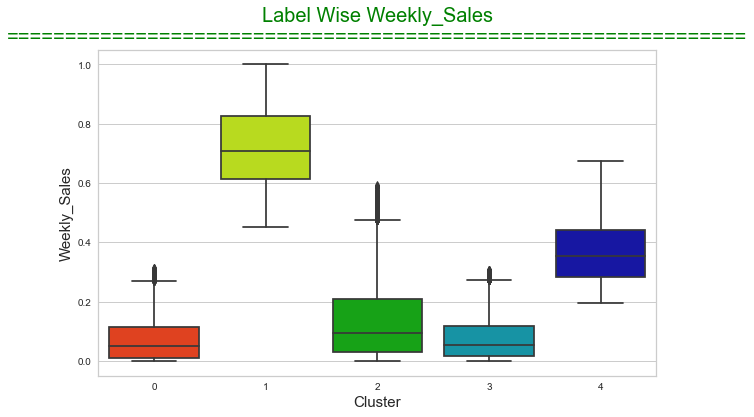

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# weekly sale plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='Weekly_Sales', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Weekly_Sales\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Cluster", fontsize=15)
plt.ylabel(ylabel="Weekly_Sales",fontsize=15)
visualizer.poof()

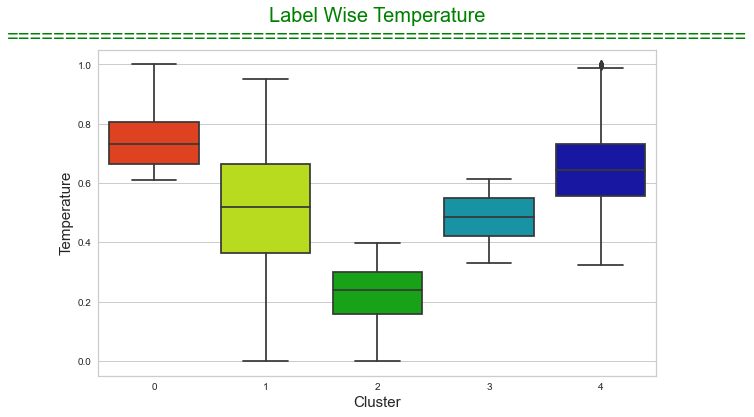

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# Temperature  plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='Temperature', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Temperature\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Cluster", fontsize=15)
plt.ylabel(ylabel="Temperature",fontsize=15)
visualizer.poof()

In [47]:
# Getting the number of sales
cust1 = df[df.Cluster==0]
print("The number of weekly sales in 1st group = ", len(cust1))
print("============================================================================================\n")

cust2 = df[df.Cluster==1]
print("The number of weekly sales in 2nd group = ", len(cust2))
print("============================================================================================\n")

cust3 = df[df.Cluster==2]
print("The number of weekly sales in 3rd group = ", len(cust3))
print("============================================================================================\n")



The number of weekly sales in 1st group =  113579

The number of weekly sales in 2nd group =  30927

The number of weekly sales in 3rd group =  71409



In [48]:
# Predict the cluster of test data
x = [[0.172,0.22], [0.1810,0.36],[0.184,0.49]]
y_predict= kmeans.fit_predict(x)  
y_predict


ValueError: n_samples=3 should be >= n_clusters=5.

In [ ]:
x = [[0.1809,0.331]]
print(model.predict(scale(x))) 

**SAVE MODEL**

In [ ]:
#joblib.dump(kmeans, "model.joblib")

**LOAD MODEL**

In [ ]:
#model = joblib.load("model.joblib")

In [ ]:
#Export to csv
#data.to_csv(r'/Users/user1/Downloads/Test.csv')